In [5]:
from unittest import result
from koala.pointsets import generate_random
from matplotlib import pyplot as plt
import numpy as np
from koala.voronization import generate_lattice
from koala.graph_color import color_lattice
from koala.hamiltonian import generate_majorana_hamiltonian
from koala.flux_finder import find_flux_sector
import pickle as pkl
import os

from koala import plotting as pl

In [13]:
metaparam_location = '/Users/perudornellas/python/imperial/cx1_am_kit/state_scaling/systems.pickle'
results_location = '/Users/perudornellas/python/imperial/cx1_am_kit/state_scaling/results/'

# load parameters
lattices = []
colorings = []
gnd_ujk_values = []
with open(metaparam_location, 'rb') as f_param:

        # load the metaparameters
        metaparmeters = pkl.load(f_param)
        points_max = metaparmeters['max_points']
        j_vals = metaparmeters['j_vals'] 
        scales = metaparmeters['scales']
        q_powers = metaparmeters['q_powers']

        # load the lattices
        for n in range(len(scales)):
                lattice, coloring, gnd_ujk, s = pkl.load(f_param)
                lattices.append(lattice)
                colorings.append(coloring)
                gnd_ujk_values.append(gnd_ujk)


energy_limit = 1.5
bins = 200
bin_regions = np.linspace(-1.5,1.5,bins+1)
bin_size = 2*energy_limit/bins
energy_centers = bin_regions[:-1] + bin_size/2



<AxesSubplot:>

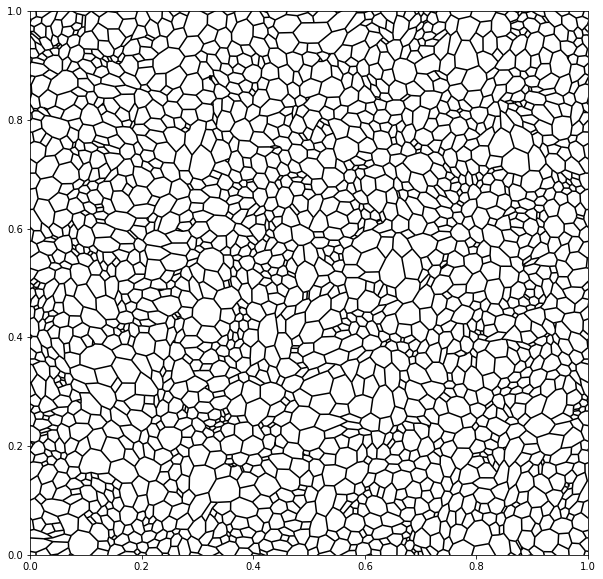

In [14]:

lattice_example_index = 499
fig, ax = plt.subplots(figsize = (10,10))
pl.plot_edges(lattices[lattice_example_index])


/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_35060/1616397519.py:28: RuntimeWarning: divide by zero encountered in log
  plt.plot(energy_centers,np.log(individual_participations[499,:,:]), label= [1,2,3,4,5])


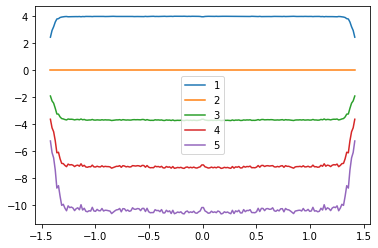

In [21]:
averaged_participations = np.zeros([len(scales) ,bins, len(q_powers)])

for filename in os.listdir(results_location):

    individual_participations = np.zeros([len(scales) ,bins, len(q_powers)])
    with open(results_location + filename, 'rb') as f:

        for n, s in enumerate(scales):

            x = pkl.load(f)

            assert(x['system_index'] == n)
            energies = x['energies']

            participations = x['participation_ratios']
            energies_binned = (energies+energy_limit)//bin_size
            
            for u in range(bins):
                indx = np.where(energies_binned == u)[0]
                num_in_indx = len(indx)
                if num_in_indx == 0:
                    continue
                averaged_p = np.average(participations[indx], axis= 0)


                individual_participations[n,u] =  averaged_p

    plt.plot(energy_centers,np.log(individual_participations[499,:,:]), label= [1,2,3,4,5])
    plt.legend()
    plt.show()

    break
                


            

            
        

         
